# Assesment-machine learning (Introduction)

I will follow the following steps to clean, analyse and conduct simple machine learning on this dataset

Based on the dataset, i assume attrition is the dependent variable which we are looking to revolve the analysis around.

1) Data cleaning
    a) Remove or replace cells with Nan or blank values (in this case, there is none)
    b) Remove columns (variables) which are low in correlation to the variable "Attrition"
        - Convert categorical variables to numerical variables
        - Get the correlation matric between all variables
        - Remove all columns with a corr below threshold (0.5 in this case)

2) Graphing
The purpose of this section is to categorise and cluster the data within each variable to better identify the correlation they have individually with "Attrition"

    a) Plot graphs for numerical variables
        - Classify the data to a max of 10 classes
        - Generate the strata for each class
        - Assign each data point to a class based on the strata
        - Aggregate them based on their assigned classes
        - Generate a bar graph (if possible) and scatter plot to show the correlation
    b) Plot graphs for categorical variables
        - Aggregate them based on their categories
        - Generate a bar graph (if possible) and scatter plot to show the correlation
Interesting insights could be retrieved from these plots. For e.g., we could realise that employees between 18 to 30 have a high probability of quiting or that sales department have a attrition rate and we know where to focus on.

    c) Plot a clustered graph of the correlation matrix
Purpose of this is to cluster independent variables based on their correlation.
Upon deriving the correlation ranking based on the "Attrition" attribute, we will know which variable affects "attrition" the most. However, the variables could be highly correlated to each other as well. From a HR perspective, if i realise that "total working years" has a high correlation with "years with manager". Should i then realise that the longer the employee has stayed, the lower probability he will quit, i could try to keep him with the same manager instead.
    
    
3) Machine learning
    a) Split the datasets for training and testing
    b) Conduct logistics regression on the dataset
    c) Conduct prediction using test dataset [assignment based on threshold level)
    d) Retrieve results of prediction


table transformed
table cleaned based on corr
                               cor   abs cor
Attrition                 1.000000  1.000000
OverTime                  0.246118  0.246118
TotalWorkingYears        -0.171063  0.171063
JobLevel                 -0.169105  0.169105
MaritalStatus             0.162070  0.162070
YearsInCurrentRole       -0.160545  0.160545
MonthlyIncome            -0.159840  0.159840
Age                      -0.159205  0.159205
YearsWithCurrManager     -0.156199  0.156199
StockOptionLevel         -0.137145  0.137145
YearsAtCompany           -0.134392  0.134392
JobInvolvement           -0.130016  0.130016
JobSatisfaction          -0.103481  0.103481
EnvironmentSatisfaction  -0.103369  0.103369
DistanceFromHome          0.077924  0.077924
JobRole                   0.067151  0.067151
Department                0.063991  0.063991
WorkLifeBalance          -0.063939  0.063939
TrainingTimesLastYear    -0.059478  0.059478
DailyRate                -0.056652  0.056652
Relations

c:\users\woon.zhenhao\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:83: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


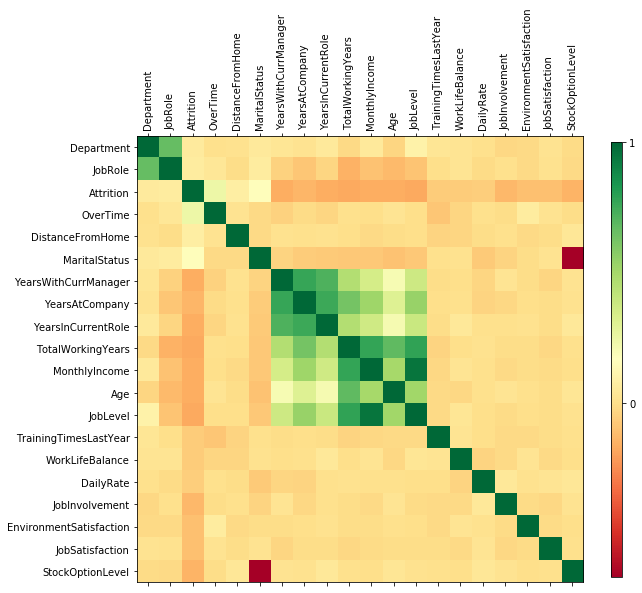

In [25]:
import pandas as pd
from sklearn import preprocessing as pp

info={}

#convert categorical columns to numerical
def cleanTable(df):
    global info
    transformations={}
    df2=df.copy()
    d=list(df2.select_dtypes(include=['object']))
    for i in d:
        tem=df2[i].astype('category')
        le=pp.LabelEncoder()
        le.fit(tem)
        df2[i]=le.transform(tem)
        transformations[i]=le
    
    info['transformations']=transformations
    return df2

#find nan values in list
def findNan(df):
    return df!=df

#clean up columns
def filterCorr(df):
    global info
    #find corr
    rawcorr=df.corr()
    store=pd.DataFrame()
    store['cor']=rawcorr['Attrition']
    store['abs cor']=abs(store['cor'])
    store=store.sort_values(by=['abs cor'], ascending=False)
    cor=store['abs cor']
    
    #remove Nan columns
    nans=findNan(cor)
    removedColumns=list(nans[nans==True].index)
    df2=df.drop(removedColumns,axis=1)
    
    #remove low corr columns
    tem=list(cor[cor<0.05].index)
    removedColumns+=tem
    df2=df2.drop(tem, axis=1)
    
    info['removed columns']=removedColumns
    return df2,store, rawcorr

#main call
def dataCleanse(df):
    global info
    df2=cleanTable(df)
    print('table transformed')
    converteddf, cor, rawcorr=filterCorr(df2)
    print('table cleaned based on corr')
    leandf=df.drop(info['removed columns'], axis=1)
    
    return leandf, converteddf, cor, info, rawcorr

def plot_corr(df,size, path):
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = mp.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    mp.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    mp.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    path='graphs/corr.png'
    mp.show()
    #mp.savefig(path)
    #mp.close()
    
def corrgraph(df):
    X = df.corr().values
    d = sch.distance.pdist(X)   
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
    df2 = df.reindex_axis(columns, axis=1)
    
    path='graphs/corr.png'
    plot_corr(df2, 10, path)
    
    return path


df=pd.read_csv('Dataset - Human Resource.csv')
leandf, converteddf, cor, info, rawcorr=dataCleanse(df)
print(cor)
path=corrgraph(converteddf)

## Item 1 (Data cleaning)
We will start off by declaring the libraries and reading in the csv file.

Following which, we will conduct the following steps to clean the file:

1) Transform categorical variables to numerical variables

2) Get the correlation matrix

3) identify columns with low corr with "Attrition" to remove

4) Return the cleanedup data in orignal data format and converted dataformat (categorical to numerical)

From the results printed above, we can also simplisticly identify which are the most influential variables over attrition rate.
As we performed the cut for variables below abs(0.05) corr, variables from RelationshipSatisfaction onwards have been removed. We can also identify "overtime" as the most influential variable.

We have also conducted basic clustering of the independent variables to not only understand their relationship with "Attrition" but also how the variables correlate with each other. We find 1 significant cluster which can be broken down further into 2 smaller clusters. We realise that for example, the variables "TotalWorkingYears", "MonthlyIncome", "Age" can be clustered together, which makes logical sense, and are inversely proportional to the "Attrition" value. A reasonable conclusion could be that the company generally reward long serving employees well and received loyalty back in return.

c:\users\woon.zhenhao\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


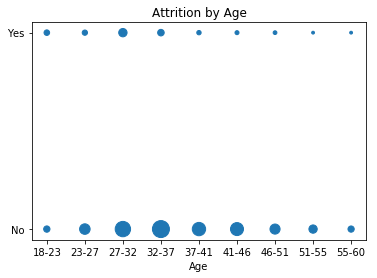

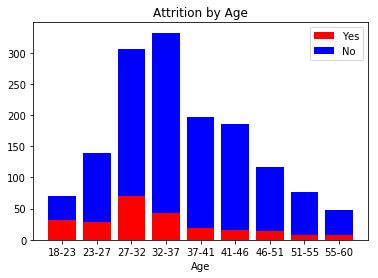

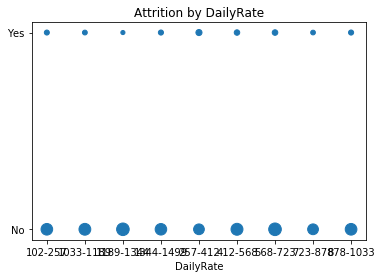

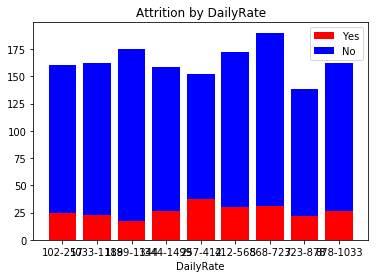

c:\users\woon.zhenhao\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


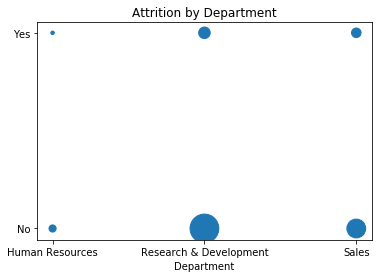

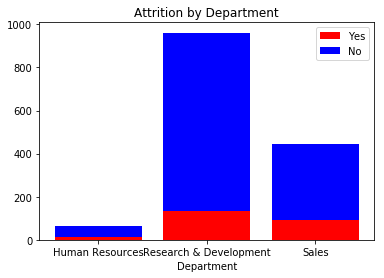

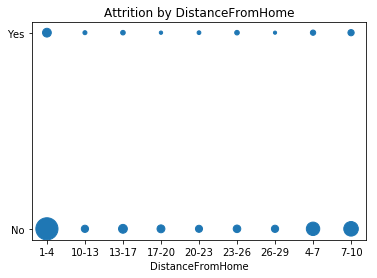

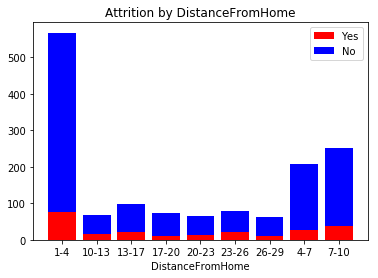

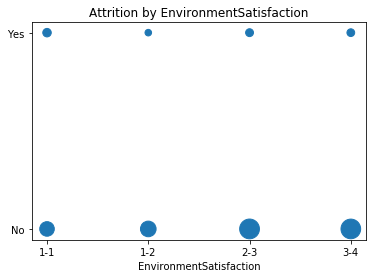

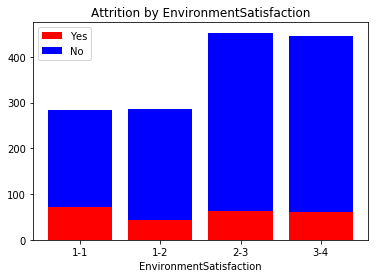

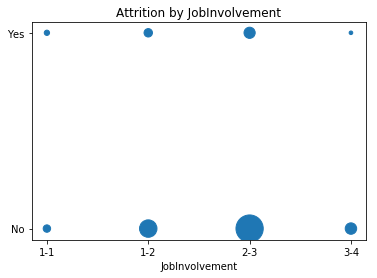

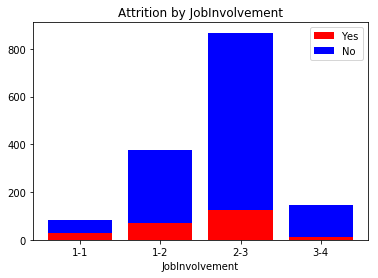

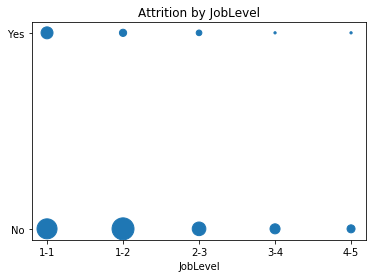

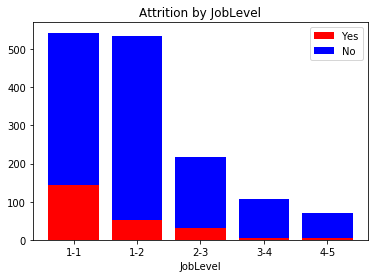

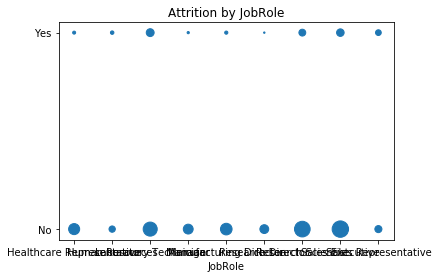

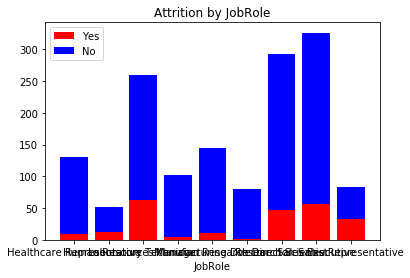

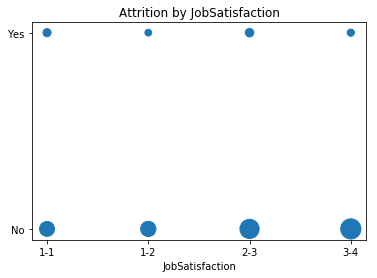

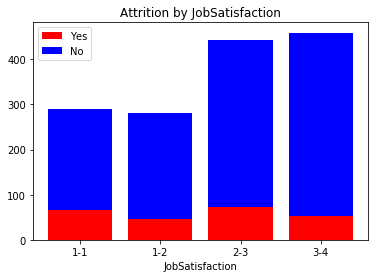

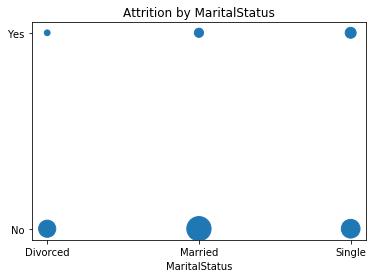

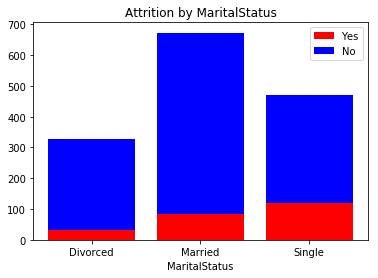

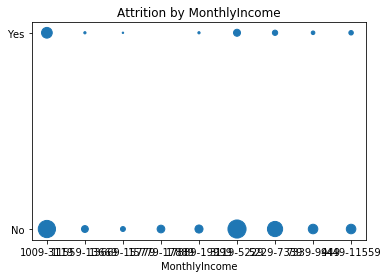

MonthlyIncome error


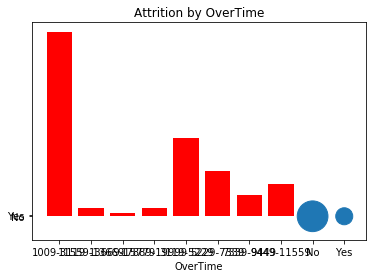

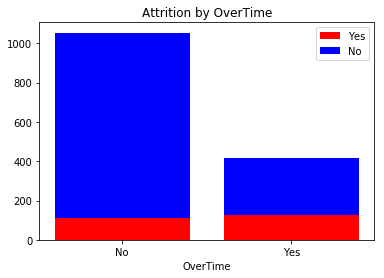

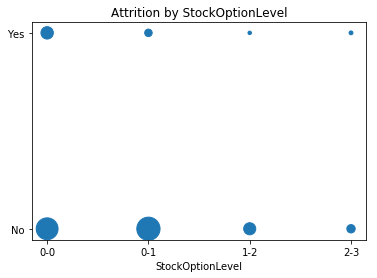

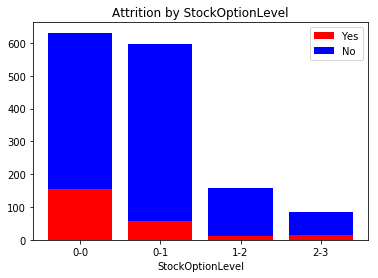

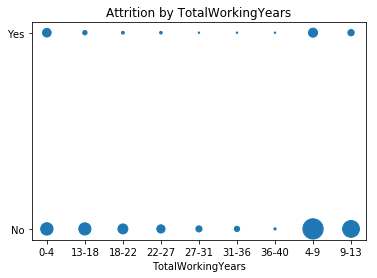

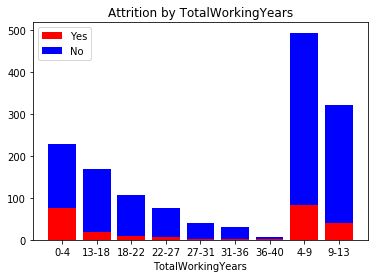

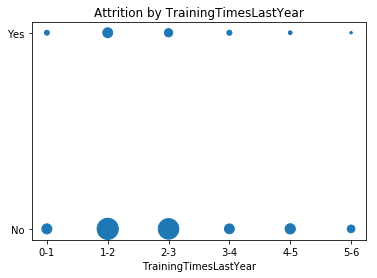

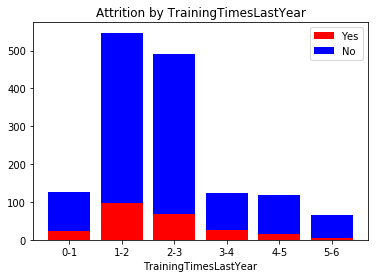

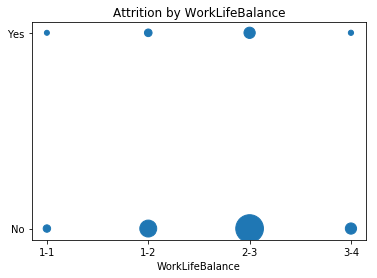

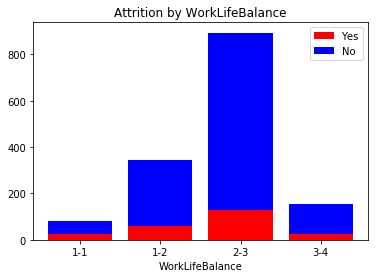

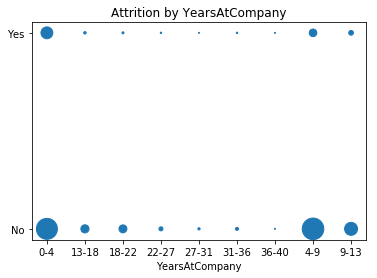

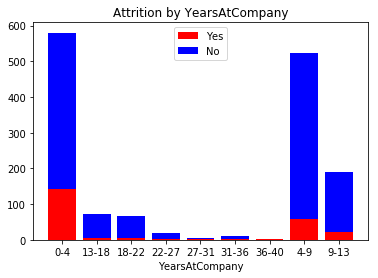

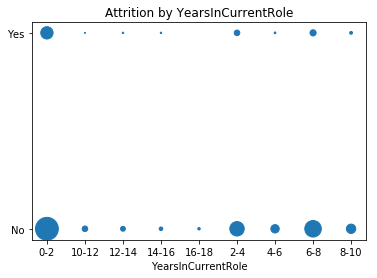

YearsInCurrentRole error


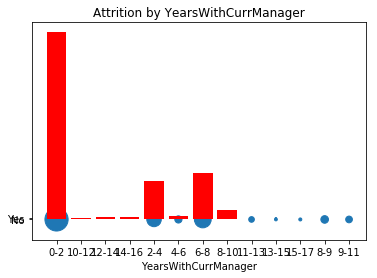

YearsWithCurrManager error
variables graph plotted


c:\users\woon.zhenhao\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:83: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


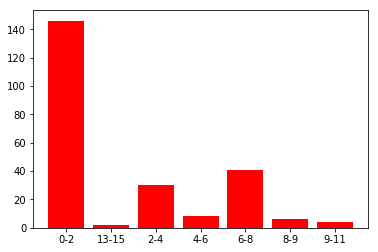

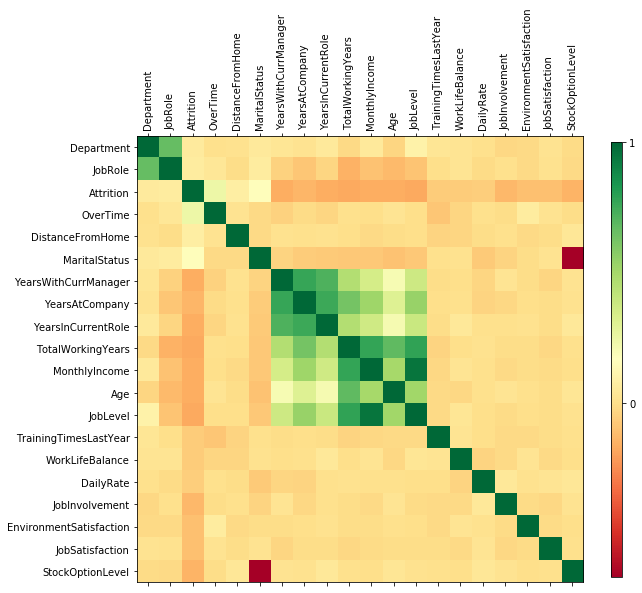

corr graph plotted


In [26]:
import matplotlib.pyplot as mp
import matplotlib.image as mpimg
import pandas as pd
import scipy.cluster.hierarchy as sch
import numpy as np

# open graph based on path
def openGraph(store, col):
    img = mpimg.imread(store[col])
    mp.imshow(img)
    mp.show()

#generate stratas for integer values
def generateStrata(tem):
    classes=10
    strata=pd.DataFrame(columns=['cap','label'])
    minv=min(tem)
    maxv=max(tem)
    interval=(maxv-minv)/(classes-1)
    for i in list(range(1,classes+1)):
        cap=round(minv+(interval*i))
        if i > 1:
            label=str(strata.iloc[i-2,0])+'-'+str(cap)
        else:
            label=str(minv)+'-'+str(cap)
        strata.loc[i]=[cap, label]
    return strata

# identify strata for value
def findStrata(val, strata):
    for i in range(len(strata)):
        if val<=strata.iloc[i,0]:
            return strata.iloc[i,1]

#change numerical column to categorical
def classify(tem):
    store=[]
    strata=generateStrata(tem)
    for i in list(tem):
        store.append(findStrata(i,strata))
        
    return store, strata

# get aggregated values based on categories
def processGraph(data, col):
    tem=data[col]
    if str(tem.dtype)=='object':
        data['class']=list(tem)
    else:
        data['class'], strata=classify(tem)
        
    data=data.groupby(['Attrition', 'class']).count().reset_index()
    return data

#main call
def plotgraph(df):
    store={}
    for col in list(df):
        if col != 'Attrition':
            data=processGraph(df[['Attrition',col]], col)
            
            mp.scatter(data['class'], data['Attrition'],s=data[col])
            mp.title('Attrition by '+ str(col))
            mp.xlabel(str(col))
            #path='graphs/'+col+'_scatter'+'.png'
            #mp.savefig(path)
            mp.show()
            #mp.close()
            #store[str(col)+'_scatter']=path
            
            try:
                d1=data[data['Attrition']=='Yes']
                d2=data[data['Attrition']=='No']
                p1=mp.bar(d1['class'], d1[col], color='r', )
                p2=mp.bar(d1['class'], d2[col], bottom=d1[col],color='b')
                mp.title('Attrition by '+ str(col))
                mp.xlabel(str(col))
                mp.legend((p1[0], p2[0]), ('Yes', 'No'))
                #path='graphs/'+col+'_bar.png'
                #mp.savefig(path)
                mp.show()
                #mp.close()
                #store[str(col)+'_bar']=path
            except:
                #mp.close()
                print(str(col)+' error')
    return store

def graph(df, converteddf):
    store=plotgraph(df)
    print('variables graph plotted')
    store['corr']=corrgraph(converteddf)
    print('corr graph plotted')
    
    return store

graphs=graph(leandf,converteddf)

## Item 2 (Graphing and analysis)

As i do my coding in a python notebook, my default method is to generate the graphs and store them in a seperate folder for further analysis. 
Over here, i have no choice but to display the graphs as part of the output which can be overwhelming.

I categorise and aggregate the data to observe the effect each variable has over attrition more clearly.

There are numerous graphs and i will not go through individually but rather highlight some interesting findings.

1) There is a high concentration of employees in the lower age ranges and this group are more prone to attrition rates
2) Sales department has a significantly higher attrition rate (almost double that of the other departments)
3) Attrition rate is high among singles but surprisingly low among divorcees
4) Training and distance from home are not that influential over the attrition rate

There are more insights that can be derieved but i will need more contexual knowledge over the numerical indicators such as job involvement etc.




In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.utils import shuffle
from sklearn.metrics import average_precision_score
import numpy as np

trainpercen=0.8
valpercen=0.2
testpercen=0
datasets={}

#Split dataset for training and testing
def splitSets(df):
    global datasets
    df2=shuffle(df)
    
    trainnum=round(trainpercen*len(df2))
    if testpercen==0:
        valnum=len(df2)-trainnum
    else:
        valnum=round(valpercen*len(df2))
    
    datasets['trainx']=df2.loc[list(range(trainnum))].drop(['Attrition'], axis=1)
    datasets['valx']=df2.loc[list(range(trainnum, trainnum+valnum))].drop(['Attrition'], axis=1)
    if testpercen >0:
        datasets['testx']=df2.loc[list(range(trainnum+valnum, len(df2)))].drop(['Attrition'], axis=1)
    
    datasets['trainy']=df2.loc[list(range(trainnum))]['Attrition']
    datasets['valy']=df2.loc[list(range(trainnum, trainnum+valnum))]['Attrition']
    
    if testpercen >0:
        datasets['testx']=df2.loc[list(range(trainnum+valnum, len(df2)))].drop(['Attrition'])
        datasets['testy']=df2.loc[list(range(trainnum+valnum, len(df2)))]['Attrition']
    
    return datasets

#training log model
def trainLogisticsModel(train, train_labels):
    logreg = LogisticRegression()
    logreg.fit(train, train_labels)
    return logreg

#get test result
def getAccuracy(model, test, test_label, threshold):
    pred = model.predict_proba(test)
    pred=np.array(pred)[:,1]
    pred=(pred>threshold).astype(int)
    
    results=pred+2*test_label
    
    tp=len(results[results==3])
    tn=len(results[results==0])
    fp=len(results[results==1])
    fn=len(results[results==2])
    
    abs_table=pd.DataFrame(columns=['actual negative','actual positive'])
    abs_table.loc['tested negative']=[tn, fn]
    abs_table.loc['tested positive']=[fp, tp]
    
    percen_table=pd.DataFrame(columns=['actual negative','actual positive'])
    percen_table.loc['tested negative']=[tn/(tn+fp), fn/(fn+tp)]
    percen_table.loc['tested positive']=[fp/(tn+fp), tp/(fn+tp)]
    
    print(abs_table)
    print(percen_table)
    print('score: '+str((tp+tn)/len(test)))
    
    return [abs_table,percen_table]

def train(df, threshold=0.5):
    splitSets(df)
    print('datasets split')
    model=trainLogisticsModel(datasets['trainx'], datasets['trainy'])
    print('model trained')
    results = getAccuracy(model, datasets['valx'],datasets['valy'], threshold)
#    print('score: '+str(score))
    
    return model, results

threshold=0.5
model, results = train(converteddf, threshold)

datasets split
model trained
                actual negative actual positive
tested negative             249              34
tested positive               2               9
                 actual negative  actual positive
tested negative         0.992032         0.790698
tested positive         0.007968         0.209302
score: 0.8775510204081632


## Item 3 (Machine learning)

Above is a simple logistics regression model through skit-learn. We process the cleanup and converted data through the skit-learn library.

With the derived model on the training dataset, we predict the probability of attrition on the testing dataset.

Based on the threshold of 0.5, we classify the results accordingly. As absolute accuracy percentage may not address the concerns of the HR department, we have the confusion matrix as part of the results as well.

As seen from the results, the threshold of 0.5 yields good results in terms of predicting attrition = 0 (true negative). However, it does not fare as well in terms of predicting attrition = 1 (true positive). If HR's intention is to err on the side of caution and focus more on senstivity (true positive rate), we can consider lowering the threshold. The opposite will be true if the HR is willing to take lesser risk in wrongly categorising someone as high attrition potential.

There are many other things we can work on such as variables engineering. We could deep dive to find out more relevant variables or reduce the redundancy of highly correlated variables. The type of regression and deep learning mechanics could also play a part but not as influential as variables engineering, in my opinion.